#Course: Deep Learning
#Program: MBA Tech AI
#Sem: V
# Academic Year: 2023-24
# Instructor: Dr.Radhika Chapaneri
# Experiment No: 7

#Roll No: R046
#Name: Tungishsanjay Sankar
#Batch : B2
#Date of Experiment: 19-10-2023





In [ ]:
from keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers,losses,metrics,regularizers

In [ ]:
# Getting train test dataframes
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_labels[0]

1

In [ ]:
# Fro convenience, words are in
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_data.shape

(25000,)

In [ ]:
test_data.shape

(25000,)

In [ ]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# Encoding the integer sequences into a binary matrix
def binary_matrix(data, dimension=10000):
  matrix = np.zeros((len(data), dimension))
  for review_number, word in enumerate(data):
    #print(review_number, word)
    matrix[review_number, word] = 1
  return matrix

In [ ]:
x_train = binary_matrix(train_data)
x_test = binary_matrix(test_data)

In [ ]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [ ]:
x_train = binary_matrix(train_data)

In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_test.shape

(25000, 10000)

In [ ]:
# Spliting into test and train
y_train =  np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
y_test.shape

(25000,)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
x_val.shape

(10000, 10000)

In [ ]:
y_val

array([1., 0., 0., ..., 1., 0., 0.], dtype=float32)

In [ ]:
partial_x_train.shape

(15000, 10000)

In [ ]:
# Making model
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/20
469/469 [==============================] - 10s 9ms/step - loss: 0.3435 - acc: 0.8579 - val_loss: 0.2800 - val_acc: 0.8882
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1991 - acc: 0.9229 - val_loss: 0.3049 - val_acc: 0.8834
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1474 - acc: 0.9467 - val_loss: 0.3445 - val_acc: 0.8776
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1076 - acc: 0.9609 - val_loss: 0.3894 - val_acc: 0.8795
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0740 - acc: 0.9743 - val_loss: 0.4630 - val_acc: 0.8744
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0488 - acc: 0.9847 - val_loss: 0.5464 - val_acc: 0.8730
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0267 - acc: 0.9927 - val_loss: 0.6869 - val_acc: 0.8761
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

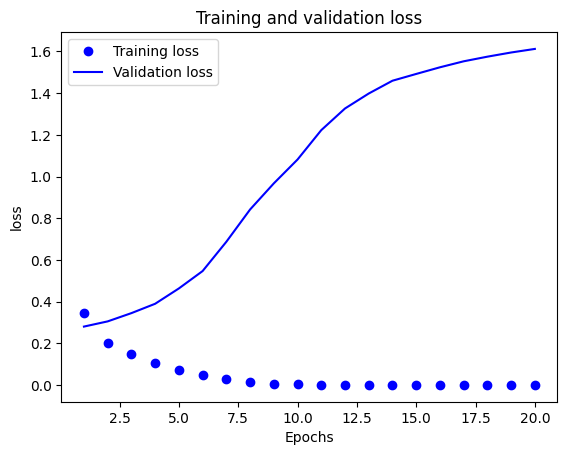

In [ ]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

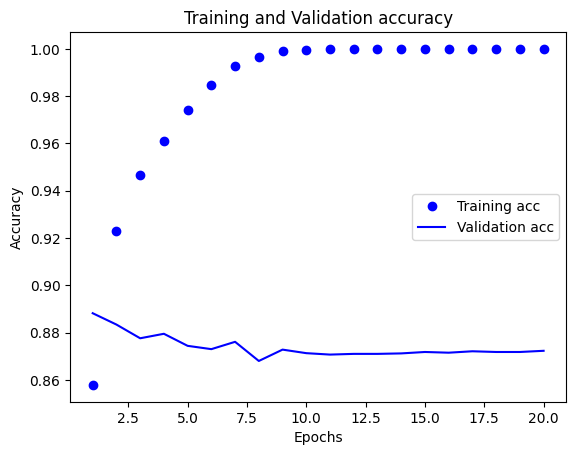

In [ ]:
# Plotting training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model
performance = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.7738 - acc: 0.8585


In [ ]:
# Predicting
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[2.1238898e-07],
       [1.0000000e+00],
       [9.9999607e-01],
       ...,
       [7.4654203e-09],
       [7.1116348e-09],
       [9.9967968e-01]], dtype=float32)

## Here i am not able to create the second model with regularizers so after each code i will be explaing what is happening there

In [ ]:
# Adding regularizers
model_1 = models.Sequential()
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu', input_shape(10000,)))
model_1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

SyntaxError: ignored

In [ ]:
# compling
model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model_1.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

NameError: ignored

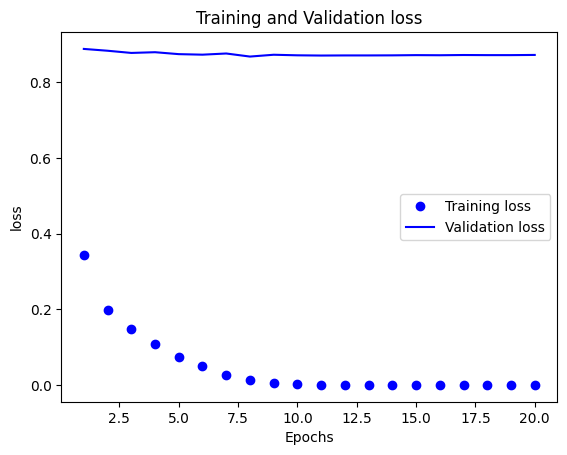

In [ ]:
# Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

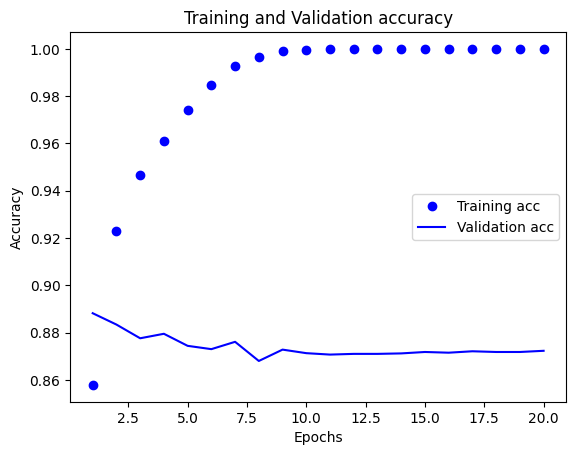

In [ ]:
# Plotting training and validation accuracy
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()